In [288]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [289]:
with open("C:/Users/PC/Clarin/rostros/Clarin.json", 'r') as f:
    db= json.load(f)

In [290]:
df = pd.DataFrame(db)

In [291]:
df=pd.concat([df.drop(['emotions'], axis=1), df['emotions'].apply(pd.Series)], axis=1)

In [292]:
df["n"]=1

In [293]:
df

,box,archivo,angry,disgust,fear,happy,sad,surprise,neutral,n
0,"[704, 746, 63, 63]",19450828.jpg,0.24,0.00,0.07,0.22,0.12,0.09,0.25,1
1,"[983, 344, 68, 68]",19450828.jpg,0.07,0.00,0.19,0.43,0.17,0.01,0.13,1
2,"[700, 308, 78, 78]",19450828.jpg,0.01,0.00,0.27,0.03,0.12,0.55,0.02,1
3,"[1277, 1452, 154, 154]",19450828.jpg,0.02,0.00,0.01,0.07,0.12,0.01,0.75,1
4,"[686, 870, 61, 61]",19450829.jpg,0.05,0.00,0.02,0.01,0.30,0.00,0.62,1
...,...,...,...,...,...,...,...,...,...,...
73369,"[893, 1617, 65, 65]",20210703.jpg,0.05,0.09,0.12,0.16,0.26,0.17,0.14,1
73370,"[1239, 1635, 91, 91]",20210703.jpg,0.37,0.00,0.06,0.01,0.13,0.10,0.33,1
73371,"[1299, 101, 74, 74]",20210703.jpg,0.04,0.01,0.07,0.38,0.25,0.02,0.23,1
73372,"[1016, 136, 94, 94]",20210703.jpg,0.12,0.03,0.24,0.06,0.41,0.01,0.14,1


In [294]:
df['year'] = df['archivo'].astype(str).str[0:4]
df['month'] = df['archivo'].astype(str).str[4:6]
df['day'] = df['archivo'].astype(str).str[6:8]
df['fecha'] = pd.to_datetime(df['month']+"/"+df['day']+"/"+df['year'], format='%m/%d/%Y')

In [295]:
mensual=df.resample('M', on='fecha').sum()

In [296]:
mensual

,angry,disgust,fear,happy,sad,surprise,neutral,n
fecha,,,,,,,,
1945-08-31,0.75,0.00,1.57,0.99,3.12,0.73,2.78,10
1945-09-30,8.64,0.02,11.32,9.32,22.52,2.07,16.99,71
1945-10-31,9.39,0.01,13.16,8.87,21.38,1.33,17.78,72
1945-11-30,11.08,0.14,15.86,15.24,24.80,3.18,22.57,93
1945-12-31,9.43,0.07,9.80,12.57,21.74,1.05,12.41,67
...,...,...,...,...,...,...,...,...
2021-03-31,35.21,0.66,15.14,41.59,27.10,4.43,34.70,159
2021-04-30,21.23,0.16,9.96,22.31,22.04,1.68,32.49,110
2021-05-31,19.84,0.63,10.77,31.90,22.34,3.25,30.10,119


In [297]:
sent = ["angry","disgust","fear","happy","sad","surprise","neutral"]
mensual['Sum'] = mensual[sent].mean(axis = 1)

In [298]:
mensual_n=pd.DataFrame()

for a in sent: 
    mensual_n[a]=mensual[a]/mensual["n"]

mensual_n["n"]=mensual["n"]

In [299]:
pca = PCA(n_components=1)
mensual_n["r"]= pca.fit_transform(mensual_n[sent])
mensual_n["I"]=mensual_n["r"]*np.log(mensual_n["n"])

bad=["angry", "disgust", "fear", "sad"]
mensual_n["r_bad"]= pca.fit_transform(mensual_n[bad])
mensual_n["I_bad"]=mensual_n["r"]*np.log(mensual_n["n"])

good=["happy", "surprise", "neutral"]
mensual_n["r_good"]= pca.fit_transform(mensual_n[good])
mensual_n["I_good"]=mensual_n["r"]*np.log(mensual_n["n"])


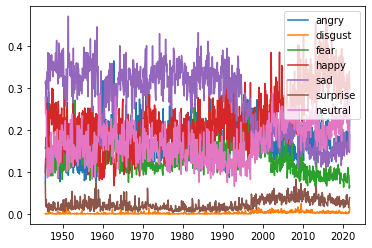

In [300]:
plt.plot(mensual_n[sent])
plt.legend(mensual_n.columns.tolist())

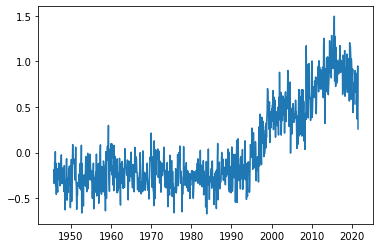

In [301]:
plt.plot(mensual_n["I"])

In [302]:
mensual_n["n"].sum()

73374

In [303]:
from pandas_summary import DataFrameSummary
vars=["angry","disgust","fear","happy","sad","surprise","neutral", "n"]
display(DataFrameSummary(df[vars]).summary())

,angry,disgust,fear,happy,sad,surprise,neutral,n
count,73374,73374,73374,73374,73374,73374,73374,73374
mean,0.169129,0.0030241,0.128677,0.251682,0.236198,0.0265211,0.183606,1
std,0.191167,0.0231056,0.153955,0.29716,0.208584,0.078514,0.20631,0
min,0,0,0,0,0,0,0,1
25%,0.04,0,0.02,0.03,0.06,0,0.03,1
50%,0.1,0,0.07,0.12,0.18,0.01,0.1,1
75%,0.24,0,0.18,0.39,0.37,0.02,0.26,1
max,1,0.94,0.99,1,0.99,1,1,1
counts,73374,73374,73374,73374,73374,73374,73374,73374
uniques,101,72,100,101,99,101,101,1


# Series Macro

In [304]:
#gdp_men=pd.read_csv("C:/Users/PC/Clarin/emae.csv", sep=";")
merval_men=pd.read_csv("C:/Users/PC/Clarin/merval.csv", sep=",")
#gdp_trim=pd.read_csv("C:/Users/PC/Clarin/pib_trim_a.csv", sep=";")
#gdp_trim=pd.read_csv("C:/Users/PC/Clarin/pib_2004.csv", sep=";")

In [305]:
merval_men['year'] =merval_men['fecha'].astype(str).str[0:4]
merval_men['month'] = merval_men['fecha'].astype(str).str[5:7]
merval_men['day'] = merval_men['fecha'].astype(str).str[8:10]
merval_men['fecha'] = pd.to_datetime(merval_men['month']+"/"+merval_men['day']+"/"+merval_men['year'], format='%m/%d/%Y')

In [306]:
merval_men=merval_men.resample('M', on='fecha').mean()

In [307]:
mensual_n=mensual_n[773:]
merval_men=merval_men[:-3]

In [308]:
mensual_n["id"]=np.arange(mensual_n.shape[0])+1
merval_men["id"]=np.arange(merval_men.shape[0])+1

In [309]:
#var=['cierre', 'id']
#merval_men=merval_men[var]

In [310]:
todo=pd.merge(mensual_n,merval_men, on="id")

In [311]:
todo["cierre_t1"]=todo["cierre"].shift()
#todo["gdp_t4"]=todo["gdp"].shift(4)
#todo["g"]=(todo["gdp"]/todo["gdp_t4"])-1
#todo["g_1"]=todo["g"].shift()
todo=todo[1:]
#todo = todo[:-3]

In [312]:
from scipy.stats import pearsonr

sent = ["angry","disgust","fear","happy","sad","surprise","neutral", "cierre"]
for a in sent: 
    corr, p = pearsonr(todo[a] , todo["cierre"])
    print(a)
    print('Pearsons correlation: %.3f' % corr)
    print("p: %.5f" % p)
    print("\n")

angry
Pearsons correlation: -0.164
p: 0.05494


disgust
Pearsons correlation: 0.100
p: 0.24339


fear
Pearsons correlation: 0.097
p: 0.25550


happy
Pearsons correlation: 0.291
p: 0.00054


sad
Pearsons correlation: -0.185
p: 0.02994


surprise
Pearsons correlation: -0.138
p: 0.10740


neutral
Pearsons correlation: -0.227
p: 0.00739


cierre
Pearsons correlation: 1.000
p: 0.00000




In [313]:
from statsmodels.tsa.stattools import adfuller

sent = ["angry","disgust","fear","happy","sad","surprise","neutral", "cierre"]
for a in sent:
    result= adfuller(todo[a])
    print(a)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print("\n")

angry
ADF Statistic: -3.819157
p-value: 0.002717


disgust
ADF Statistic: -9.320116
p-value: 0.000000


fear
ADF Statistic: -9.719576
p-value: 0.000000


happy
ADF Statistic: -2.918475
p-value: 0.043241


sad
ADF Statistic: -8.820042
p-value: 0.000000


surprise
ADF Statistic: -8.273518
p-value: 0.000000


neutral
ADF Statistic: -2.604189
p-value: 0.092135


cierre
ADF Statistic: -1.369907
p-value: 0.596615




In [317]:
import statsmodels.api as sm
X=["cierre_t1", "I_bad"]

X1 = todo[X]
y=todo["cierre"]
result = sm.OLS(y, X1).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 cierre   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              7996.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):                   9.24e-142
Time:                        17:28:32   Log-Likelihood:                         -791.45
No. Observations:                 138   AIC:                                      1587.
Df Residuals:                     136   BIC:                                      1593.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------